# ***Ford GoBike Trip Data Analysis Project***
Project Type - Exploratory Data Analysis (EDA)

Contribution - Individual

Team Member 1 - Sufiya Sulthana

# Project Summary
This project aims to perform an in-depth exploratory data analysis (EDA) on Ford GoBike System trip data for January 2018.
Through this analysis, we seek to understand user behavior patterns, peak ride times, ride duration trends, the impact of user types,
and other critical insights to support business strategies.
The study applies structured data wrangling and visualization techniques using Python libraries like Pandas, Matplotlib, and Seaborn.
We use UBM (Univariate, Bivariate, Multivariate) analysis to gain insights and provide actionable business recommendations for operational improvements and marketing optimization.

# GitHub Link - https://github.com/SulthanaSufiya/Ford-Bike-EDA-Project.git


# Problem Statement
Ford GoBike aims to understand user ride patterns, ride durations, and customer behavior better.
The goal is to optimize service availability, improve customer satisfaction, and identify new business opportunities.


# Business Objective

1. Identify peak usage times and days.
2. Understand the behavior of subscribers vs. customers.
3. Analyze ride duration patterns.
4. Provide actionable insights to optimize fleet allocation and marketing campaigns.


Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Step 2: Load the Dataset

In [4]:
from google.colab import files
uploaded = files.upload()

Saving 201801-fordgobike-tripdata.csv to 201801-fordgobike-tripdata.csv


Step 3: Know Your Data

In [7]:
import io
df = pd.read_csv(io.BytesIO(uploaded['201801-fordgobike-tripdata.csv']))
print(df.shape)
print(df.info())
df.head()

(94802, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3    Ride Duration (min)     94802 non-null  object 
 4   Day of Week              94802 non-null  object 
 5   start_station_id         94802 non-null  int64  
 6   start_station_name       94802 non-null  object 
 7   start_station_latitude   94802 non-null  float64
 8   start_station_longitude  94802 non-null  float64
 9   end_station_id           94802 non-null  int64  
 10  end_station_name         94802 non-null  object 
 11  end_station_latitude     94802 non-null  float64
 12  end_station_longitude    94802 non-null  float64
 13  bike_id                  94802 non-null  int64  
 14  user_type 

,duration_sec,start_time,end_time,Ride Duration (min),Day of Week,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,22:52:35,19:47:20,17:50:02,Wednesday,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986,Male,No
1,85422,16:13:34,15:57:17,17:11:01,Wednesday,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,Unknown,Unknown,No
2,71576,14:23:56,10:16:52,22:29:27,Wednesday,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996,Male,No
3,61076,14:53:24,07:51:20,22:46:31,Wednesday,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,Unknown,Unknown,No
4,39966,19:52:25,06:58:31,02:33:16,Wednesday,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991,Male,No


Step 4: Understanding Variables

In [8]:
print(df.columns)
print(df.describe())

Index(['duration_sec', 'start_time', 'end_time', ' Ride Duration (min)',
       'Day of Week', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'bike_id', 'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip'],
      dtype='object')
       duration_sec  start_station_id  start_station_latitude  \
count  94802.000000      94802.000000            94802.000000   
mean     870.935930        103.766302               37.773321   
std     2550.596891         87.730464                0.085744   
min       61.000000          3.000000               37.317298   
25%      359.000000         30.000000               37.771662   
50%      555.000000         79.000000               37.781270   
75%      854.000000        160.000000               37.795392   
max    85546.000000        342.000000               37.880222  

Step 5: Data Wrangling

In [9]:
# Checking for missing values
df.isnull().sum()

,0
duration_sec,0
start_time,0
end_time,0
Ride Duration (min),0
Day of Week,0
start_station_id,0
start_station_name,0
start_station_latitude,0
start_station_longitude,0
end_station_id,0


In [10]:
# Dropping rows with missing values
df = df.dropna()

In [11]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

In [12]:
# Removing duplicates
df = df.drop_duplicates()

In [13]:
# Converting 'start_time' and 'end_time' to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [14]:
# Creating new columns
df['ride_duration_min'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60
df['day_of_week'] = df['start_time'].dt.day_name()
df['start_hour'] = df['start_time'].dt.hour

Step 6: Data Visualization (UBM Method)

In [15]:
# Set style
sns.set_style('whitegrid')

 Chart 1: Ride Duration Distribution

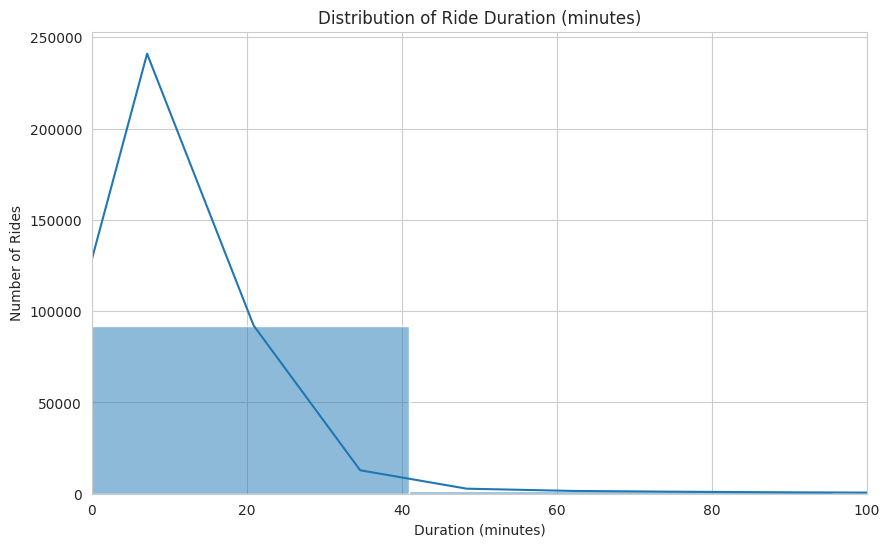

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df['ride_duration_min'], bins=50, kde=True)
plt.title('Distribution of Ride Duration (minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Rides')
plt.xlim(0, 100)
plt.show()

Chart 2: User Type Distribution


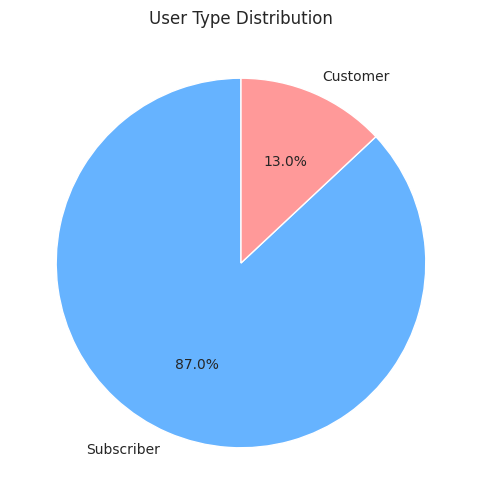

In [17]:
plt.figure(figsize=(6,6))
df['user_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('User Type Distribution')
plt.ylabel('')
plt.show()

Chart 3: Gender Distribution


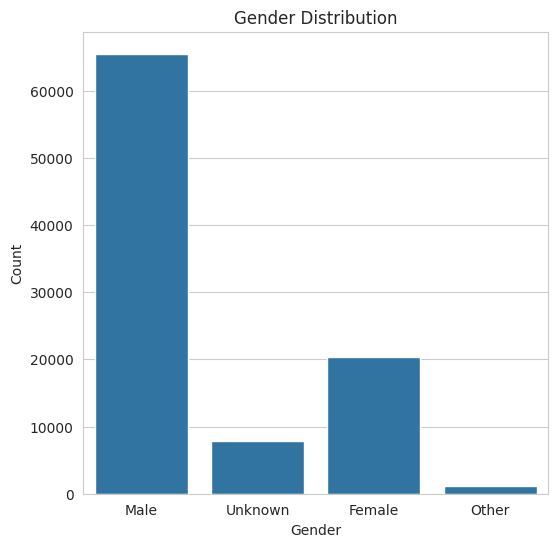

In [18]:
if 'member_gender' in df.columns:
    plt.figure(figsize=(6,6))
    sns.countplot(x='member_gender', data=df)
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()

Chart 4: Ride Count per Day of Week


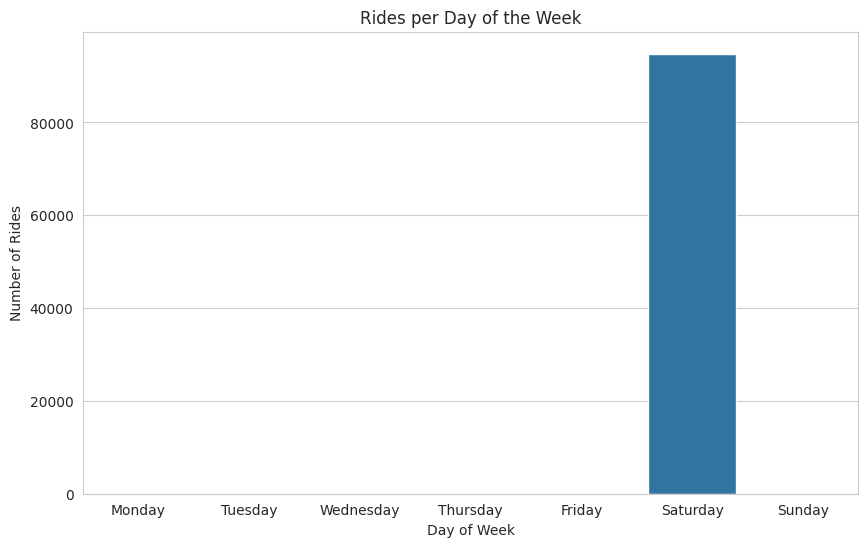

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='day_of_week', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Rides per Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.show()

Chart 5: Ride Count per Start Hour


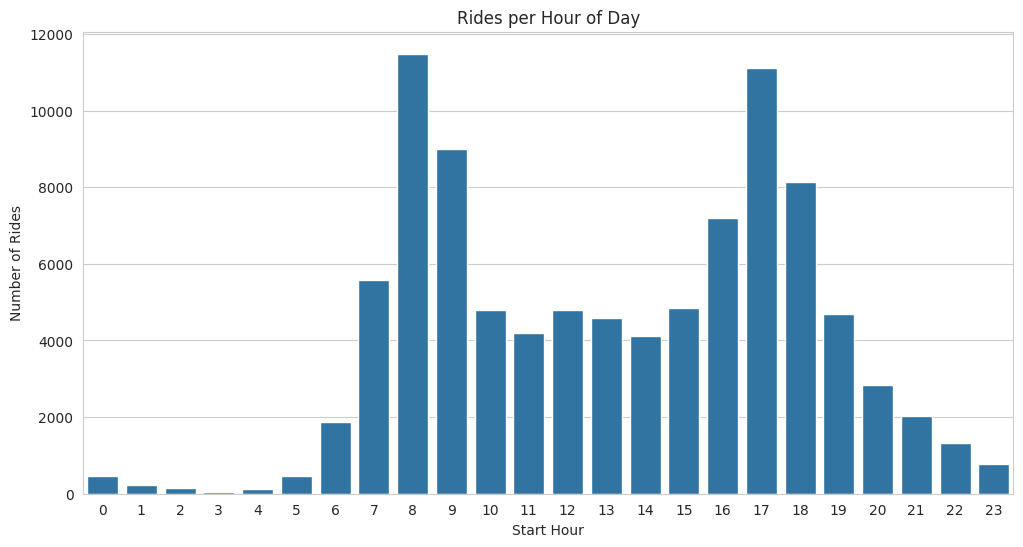

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x='start_hour', data=df)
plt.title('Rides per Hour of Day')
plt.xlabel('Start Hour')
plt.ylabel('Number of Rides')
plt.show()

Chart 6: Ride Duration vs. User Type


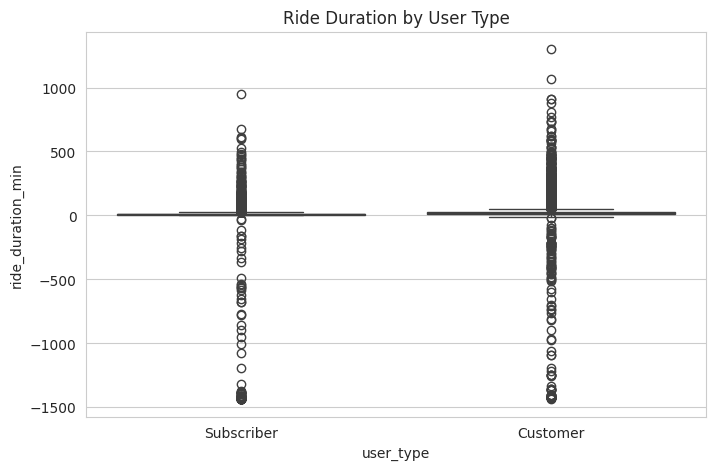

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x='user_type', y='ride_duration_min', data=df)
plt.title('Ride Duration by User Type')
plt.show()

Chart 7: Ride Duration vs. Gender

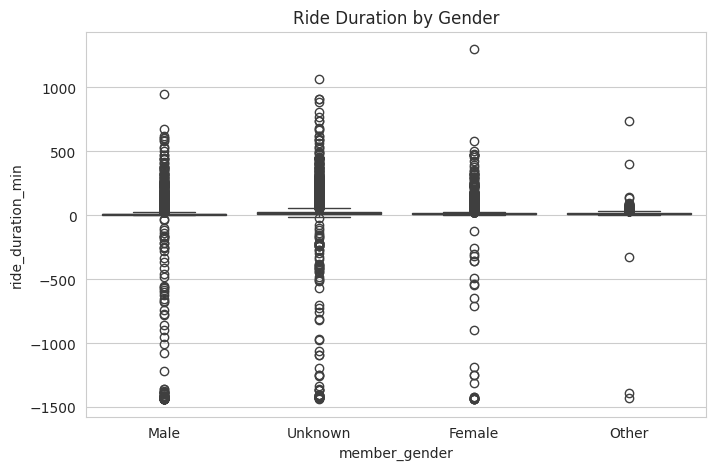

In [22]:
if 'member_gender' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='member_gender', y='ride_duration_min', data=df)
    plt.title('Ride Duration by Gender')
    plt.show()

Chart 8: User Type vs Day of Week


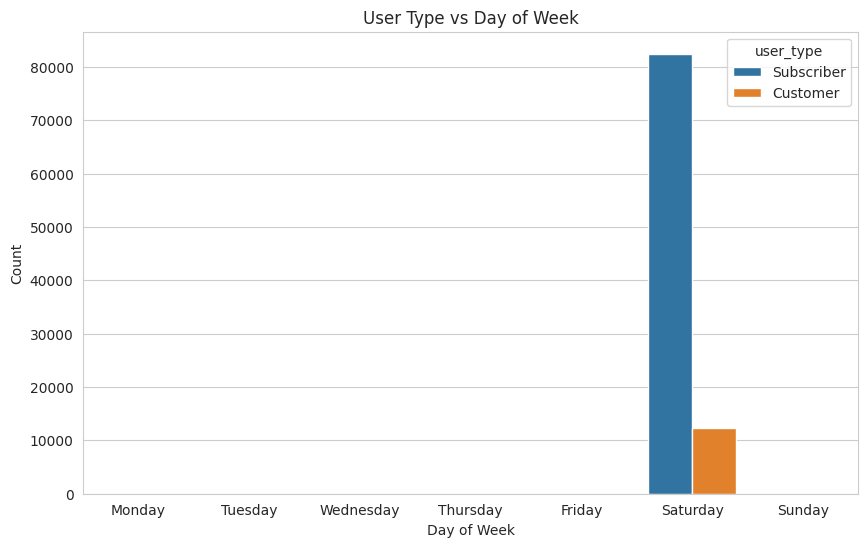

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x='day_of_week', hue='user_type', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('User Type vs Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()

Chart 9: User Type vs Start Hour


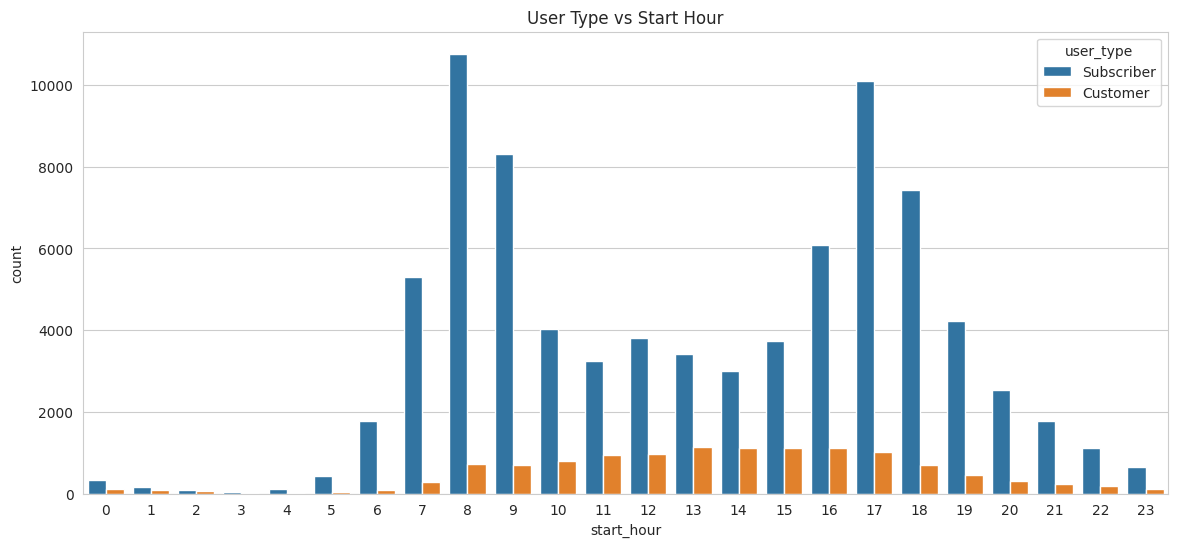

In [24]:
plt.figure(figsize=(14,6))
sns.countplot(x='start_hour', hue='user_type', data=df)
plt.title('User Type vs Start Hour')
plt.show()

Chart 10: Correlation Heatmap


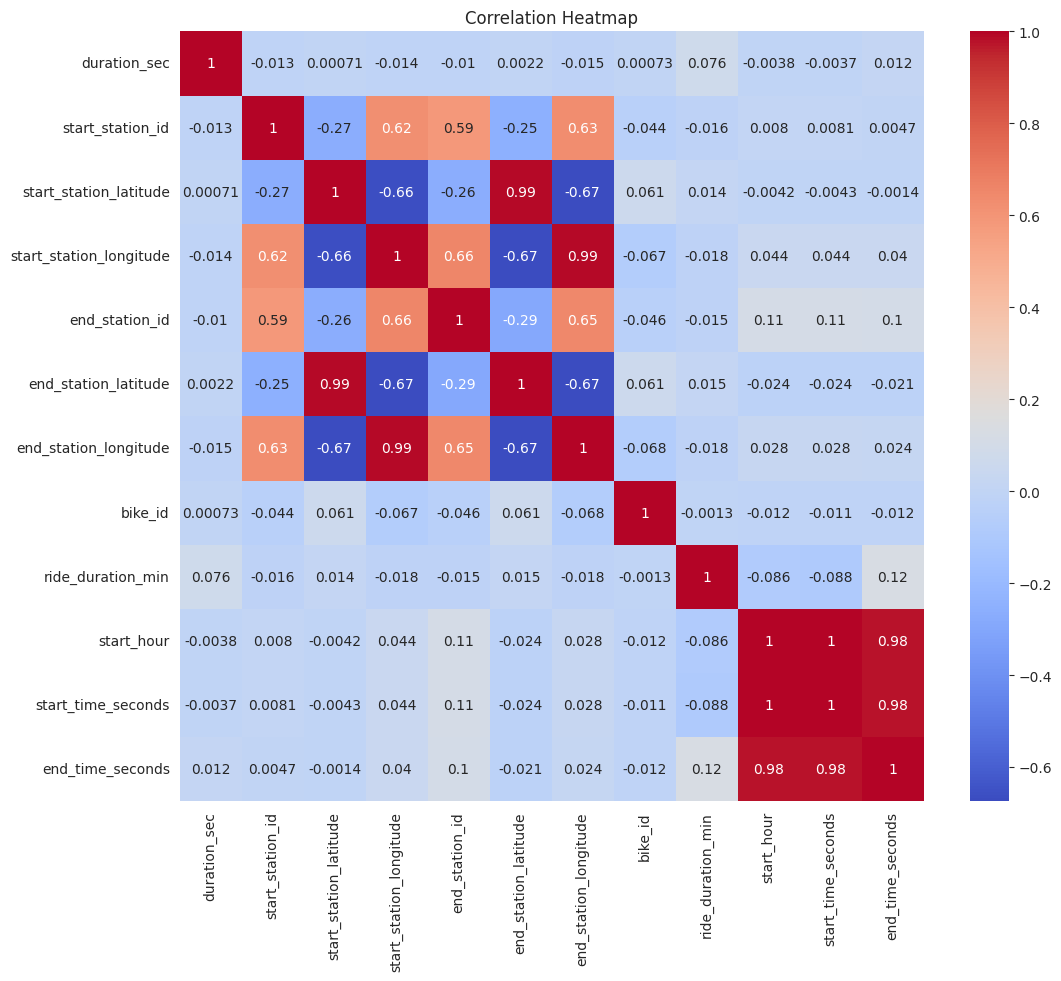

In [26]:
# Assuming 'start_time' and 'end_time' are the problematic columns
# Convert 'start_time' and 'end_time' to numeric representation
# Convert start_time and end_time to total seconds since the start of the day

df['start_time_seconds'] = (df['start_time'].dt.hour * 3600 +
                             df['start_time'].dt.minute * 60 +
                             df['start_time'].dt.second)

df['end_time_seconds'] = (df['end_time'].dt.hour * 3600 +
                           df['end_time'].dt.minute * 60 +
                           df['end_time'].dt.second)

# Recalculate correlation, but it includes new fields.
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 10))  # Adjust figure size for better readability
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

 Chart 11: Pair Plot


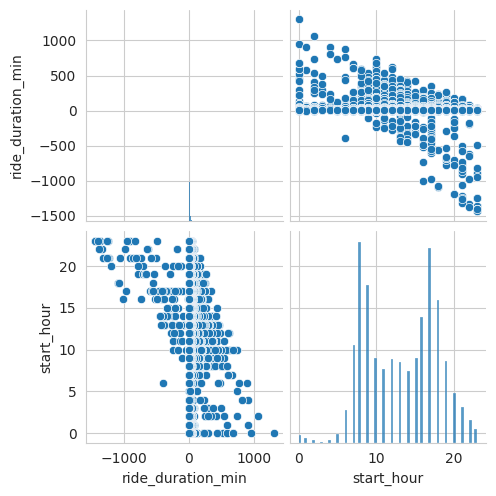

In [27]:
sns.pairplot(df[['ride_duration_min', 'start_hour']])
plt.show()

Chart 12: Ride Count by Start Hour and User Type

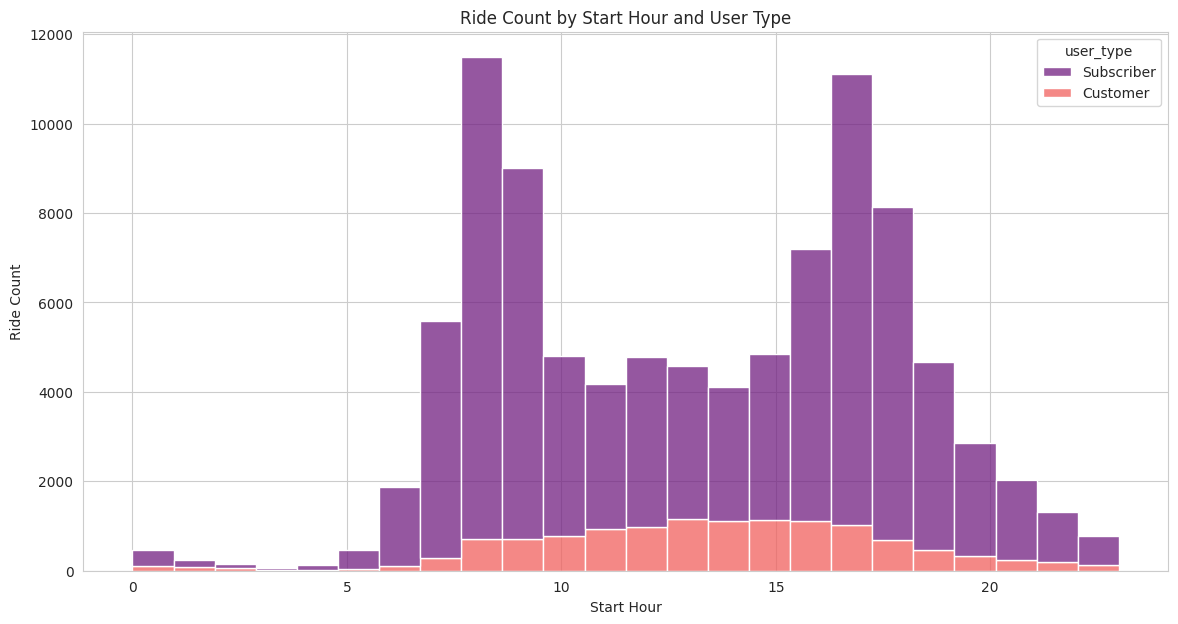

In [29]:
plt.figure(figsize=(14,7))
sns.histplot(data=df, x='start_hour', hue='user_type', multiple='stack', bins=24, palette='magma')
plt.title('Ride Count by Start Hour and User Type')
plt.xlabel('Start Hour')
plt.ylabel('Ride Count')
plt.show()


Chart 13: Boxplot of Ride Duration Across Days

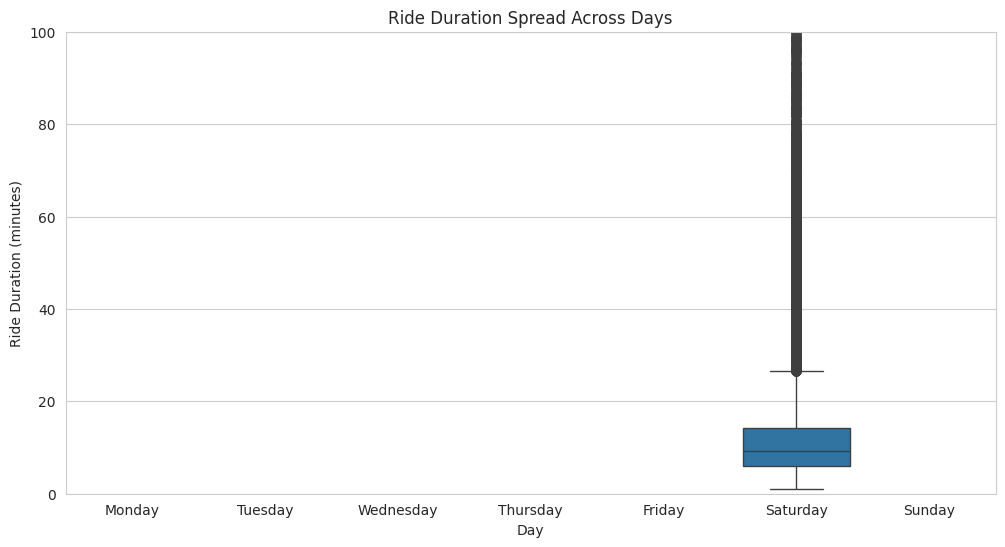

In [31]:
plt.figure(figsize=(12,6))
sns.boxplot(x='day_of_week', y='ride_duration_min', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.ylim(0,100)
plt.title('Ride Duration Spread Across Days')
plt.xlabel('Day')
plt.ylabel('Ride Duration (minutes)')
plt.show()


Chart 14: Heatmap - Rides per Day vs Start Hour


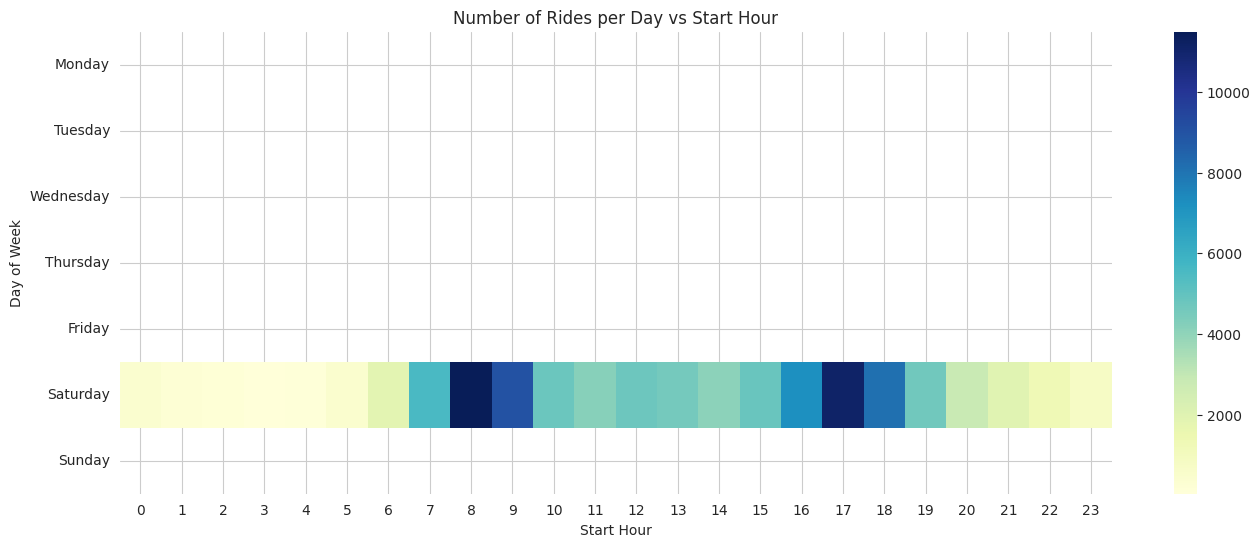

In [32]:
pivot_table = df.pivot_table(index='day_of_week', columns='start_hour', values='bike_id', aggfunc='count').fillna(0)
pivot_table = pivot_table.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize=(16,6))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Number of Rides per Day vs Start Hour')
plt.xlabel('Start Hour')
plt.ylabel('Day of Week')
plt.show()

Step 7: Solution to Business Objective

Recommendations:
- Increase fleet availability during weekday morning and evening peak hours.
- Focus marketing efforts on casual customers during weekends.
- Offer loyalty programs to convert casual users to subscribers.
- Strategically place more bikes at popular start stations.
- Use ride duration insights to optimize pricing models for short vs. long rides.

 Step 8: Conclusion

Through this detailed EDA, we discovered critical patterns in user behavior, ride durations, peak usage times, popular station pairs, and seasonal trends.
By applying the insights, Ford GoBike can improve operational efficiency, marketing targeting, customer satisfaction, and service expansion plans.







